- ID: 고객의 고유번호
- Warehouse block: 회사의 창고 (A,B,C,D,E)
- Mode of shipment:선박, 항공, 육로 등의 배송방법
- Customer care calls: 배송 문의 전화 수
- Customer rating: 고객평가도. 리커트척도 (1 ~ 5)
- Cost of the product: 제품 가격 ($)
- Prior purchases: 이전 구매 횟수
- Product importance: 제품 중요도 (low, medium, high)
- Gender: 고객 성별
- Discount offered: 제공되는 할인
- Weight in gms: 제품의 무게 (g)
- Reached on time: 제품이 정시에 배송되었는지 여부 (1 = 정시에 도달하지 않음, 0 = 정시에 도달함)

## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab/KedaPPo/E_Commerce__Shipping_Train.csv')
df = df.drop(['ID'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 컬럼명 바꾸기
df = df.rename(columns = {
    'Warehouse_block':'Warehouse',
    'Mode_of_Shipment':'Shipment',
    'Customer_care_calls':'Care_call',
    'Customer_rating':'Rate',
    'Cost_of_the_Product':'Product_cost',
    'Discount_offered':'Discount',
    'Weight_in_gms':'Weight',
    'Reached.on.Time_Y.N':'Reach_ontime'
})
df.isnull().sum()

Warehouse             0
Shipment              0
Care_call             0
Rate                  0
Product_cost          0
Prior_purchases       0
Product_importance    0
Gender                0
Discount              0
Weight                0
Reach_ontime          0
dtype: int64

## 데이터의 형태

- 명목형 범주:

    Warehouse, Shipment, Gender, Reach on time

- 순서형 범주:

    Product importance

- 이진형 범주:

    Rate
- 연속형 범주:

    Care call, Product cost, Discount, Weight, Prior purchases


### 데이터 형태 확인

In [3]:
# 데이터타입 확인
df.dtypes

Warehouse             object
Shipment              object
Care_call              int64
Rate                   int64
Product_cost           int64
Prior_purchases        int64
Product_importance    object
Gender                object
Discount               int64
Weight                 int64
Reach_ontime           int64
dtype: object

In [4]:
# 범주형 데이터의 고유값 확인
cols_ca = ['Warehouse','Shipment','Gender','Product_importance','Reach_ontime','Rate','Prior_purchases']
for col in cols_ca:
    print(col, df[col].unique())

Warehouse ['D' 'F' 'A' 'B' 'C']
Shipment ['Flight' 'Ship' 'Road']
Gender ['F' 'M']
Product_importance ['low' 'medium' 'high']
Reach_ontime [1 0]
Rate [2 5 3 1 4]
Prior_purchases [ 3  2  4  6  5  7 10  8]


### 범주형 데이터 별 빈도수

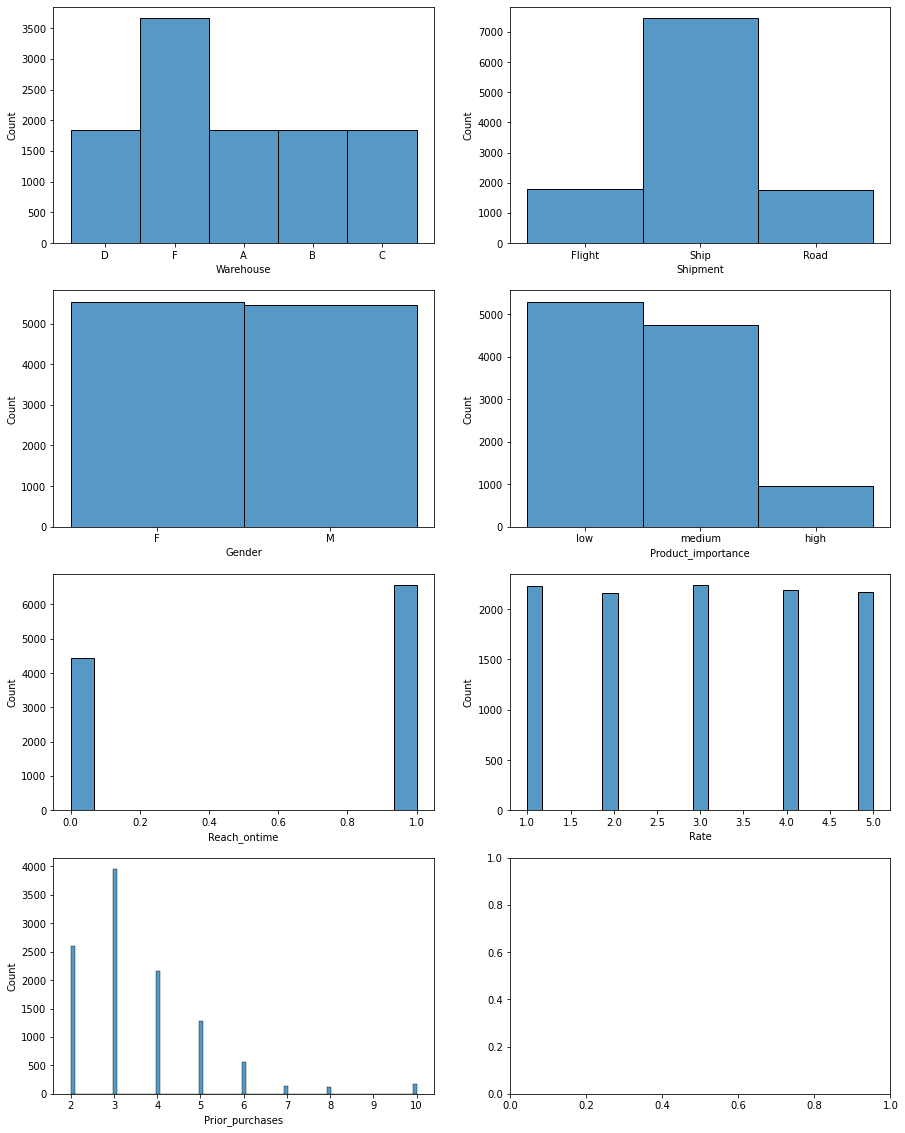

In [5]:
# 범주형 데이터의 histogram
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,2, figsize = (15,20) )

k = 1
for i in range(len(cols_ca)):
    if k <= 7:
        plt.subplot(4,2,k)
        sns.histplot(df[cols_ca[i]])
        i += 1
        k += 1
plt.show()

### 연속형 데이터 빈도수

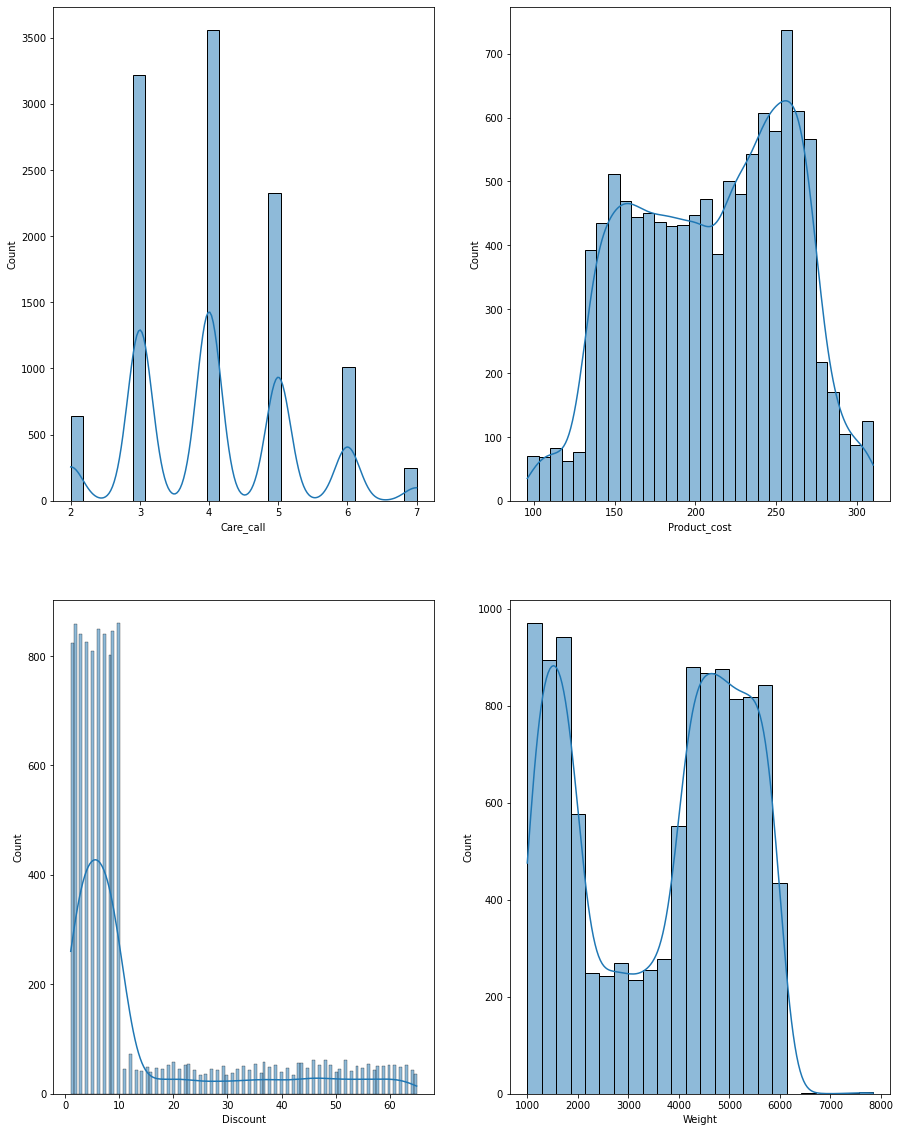

In [6]:
# 연속형 데이터의 histogram
cols_dis = ['Care_call','Product_cost','Discount','Weight']

fig, axes = plt.subplots(2,2, figsize = (15,20) )

k = 1
for i in range(len(cols_dis)):
    if k <= 7:
        plt.subplot(2,2,k)
        sns.histplot(df[cols_dis[i]], kde = True)
        i += 1
        k += 1
plt.show()

## 상관관계 - 히트맵

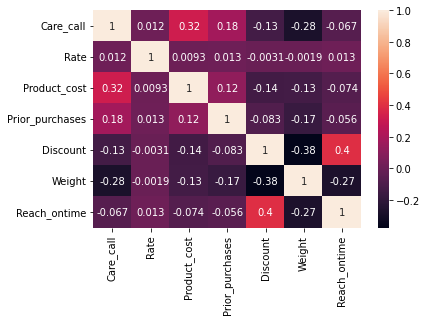

In [7]:
# 히트맵으로 특성별 상관관계를 살펴본다.
sns.heatmap(df.corr(), annot = True)

- Product cost와 Care call이 0.32의 상관관계
- Distcount 와 Reach on time이 0.4의 상관관계

## Product cost와 Care call의 상관관계

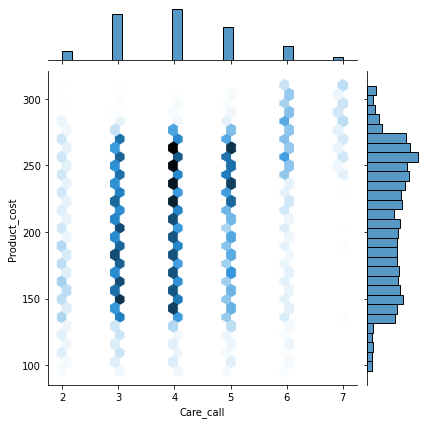

In [8]:
# 상관관계가 높은 변수들 간의 그래프
sns.jointplot(x = df['Care_call'], y = df['Product_cost'], kind = 'hex')

In [9]:
cp = df.groupby('Care_call').Product_cost.agg(['count','sum','mean','max'])
#cp

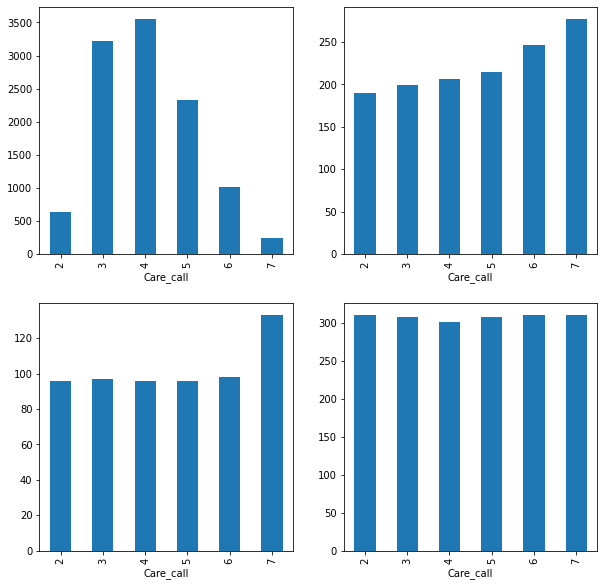

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
df.groupby('Care_call').Product_cost.count().plot(kind='bar', ax=ax[0][0])
df.groupby('Care_call').Product_cost.mean().plot(kind='bar', ax=ax[0][1])
df.groupby('Care_call').Product_cost.min().plot(kind='bar', ax=ax[1][0])
df.groupby('Care_call').Product_cost.max().plot(kind='bar', ax=ax[1][1])

- 문의 전화의 빈도는 4,3,5건이 차례로 많고, 7건이 가장 적다.
- 하지만 품목의 가격 평균은 7건일 때가 가장 가격이 높다.
- 평균의 그래프를 보면 문의전화 건수가 많을수록 제품가격 평균이 높다.
- 문의 전화 건당 가장 저렴한 품목을 살펴보아도 다른 품목에 비해 7건이 가장 가격이 높다.




### Care call & Product cost 비교해석

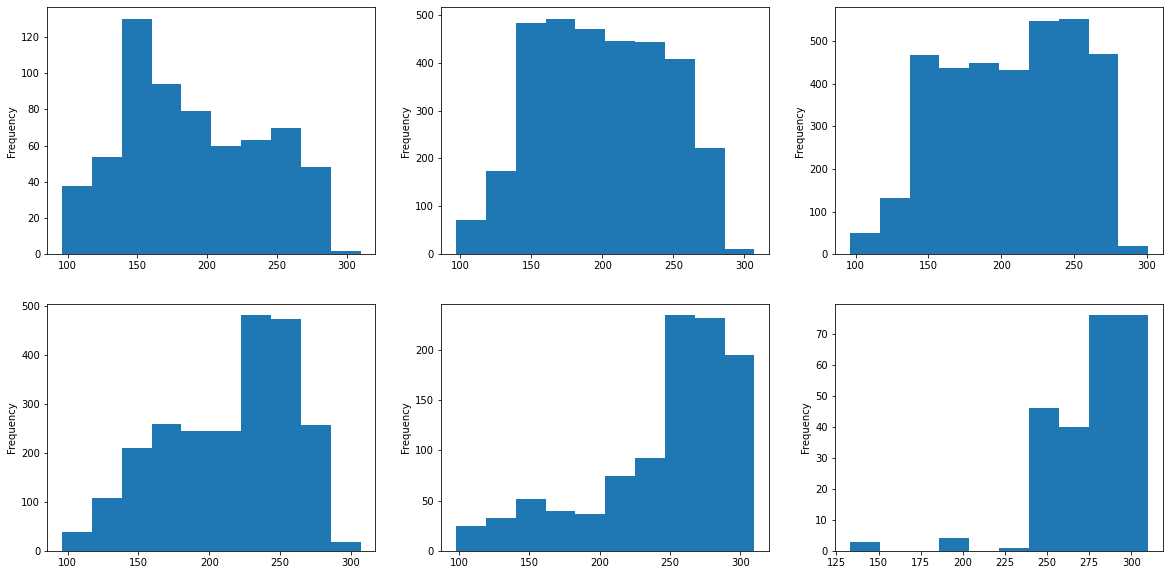

In [11]:
# 문의 전화 건수 별 품목가격 빈도 분포
fig, ax = plt.subplots(2,3, figsize=(20,10))
df[df['Care_call'] == 2]['Product_cost'].plot(kind='hist', ax=ax[0][0])
df[df['Care_call'] == 3]['Product_cost'].plot(kind='hist', ax=ax[0][1])
df[df['Care_call'] == 4]['Product_cost'].plot(kind='hist', ax=ax[0][2])
df[df['Care_call'] == 5]['Product_cost'].plot(kind='hist', ax=ax[1][0])
df[df['Care_call'] == 6]['Product_cost'].plot(kind='hist', ax=ax[1][1])
df[df['Care_call'] == 7]['Product_cost'].plot(kind='hist', ax=ax[1][2])

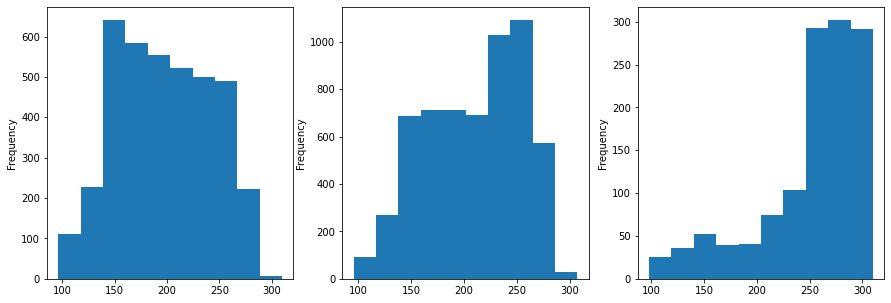

In [12]:
# (2,3), (4,5), (6,7)
fig, ax = plt.subplots(1,3, figsize=(15,5))
df[(df['Care_call'] == 2) | (df['Care_call'] == 3)]['Product_cost'].plot(kind='hist', ax=ax[0])

df[(df['Care_call'] == 4) | (df['Care_call'] == 5)]['Product_cost'].plot(kind='hist', ax=ax[1])

df[(df['Care_call'] == 6) | (df['Care_call'] == 7)]['Product_cost'].plot(kind='hist', ax=ax[2])


- 300달러 부근의 품목은 문의 전화 수가 6,7건일 때에 몰려있는 것을 볼 수 있다.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


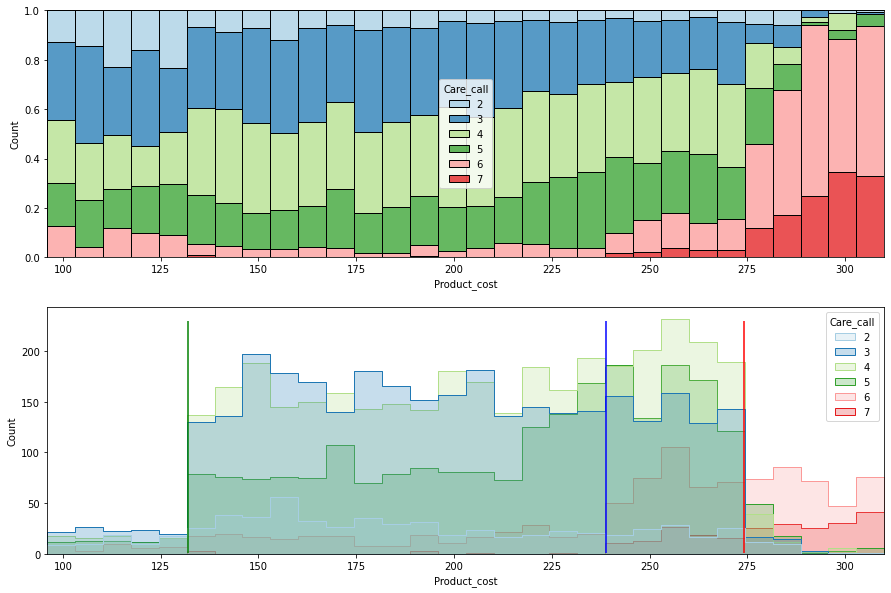

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.histplot(x = df['Product_cost'], hue = df['Care_call'], palette = 'Paired',multiple='fill')

plt.subplot(2,1,2)
ax = plt.subplot(2,1,2)
plt.vlines(274.2,0.5,230,color="red")
plt.vlines(238.9,0.5,230,color="blue")
plt.vlines(132,0.5,230,color="green")
ax.margins(x=0)
sns.histplot(x = df['Product_cost'], hue = df['Care_call'], palette = 'Paired', stat="count", element="step")

- 품목의 가격이 
- 약 132달러 이상부터 6건미만의 문의 전화 빈도 수가 증가한다.
- 약 240달러 이상일수록 6건이상의 문의 전화 빈도 수가 증가한다.
- 약 275달러 이상일수록 6건미만의 문의 전화 빈도수가 급격이 낮아진다.


- 약 275달러부터 6건이상의 문의 전화 비율이 높아진다.


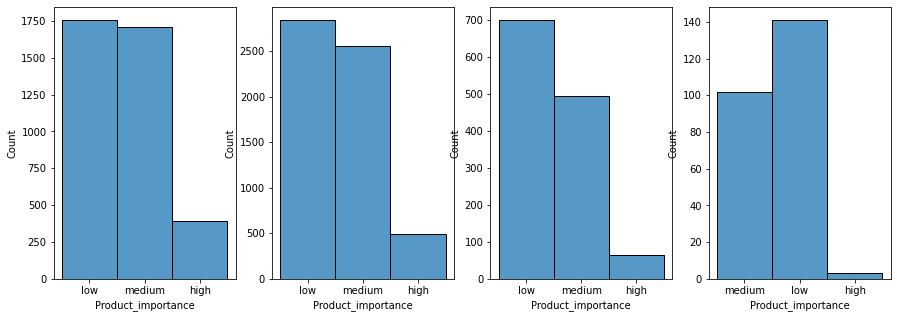

In [14]:
# 문의전화 건수와 제품 중요도
# fig, ax = plt.subplots(1,3, figsize=(15,5))
df1 = df[(df['Care_call'] == 2) | (df['Care_call'] == 3)]
df2 = df[(df['Care_call'] == 4) | (df['Care_call'] == 5)]
df3 = df[(df['Care_call'] == 6) | (df['Care_call'] == 7)]
df4 = df[df['Care_call'] == 7]

fig, ax = plt.subplots(1,4, figsize=(15,5))

sns.histplot(x = df1['Product_importance'], ax=ax[0])
sns.histplot(x = df2['Product_importance'], ax=ax[1])
sns.histplot(x = df3['Product_importance'], ax=ax[2])
sns.histplot(x = df4['Product_importance'], ax=ax[3])

- 문의전화가 많은 이유는 제품 중요가 높아서일것이라 예측했으나, 실제로는 상관관계가 없었다.
- 사실 히트맵을 살펴보면, 문의 전화는 제품가격과 이전 구매 횟수와 상관관계가 큰 것을 알 수 있다.

    문의 전화 ~ 제품가격 : 0.32  
    문의 전화 ~ 이전 구매 횟수 : 0.18  
    제품가격 ~ 이전 구매 횟수 : 0.12

### Care call에 대한 Product cost와 Prior purchases 비교해석

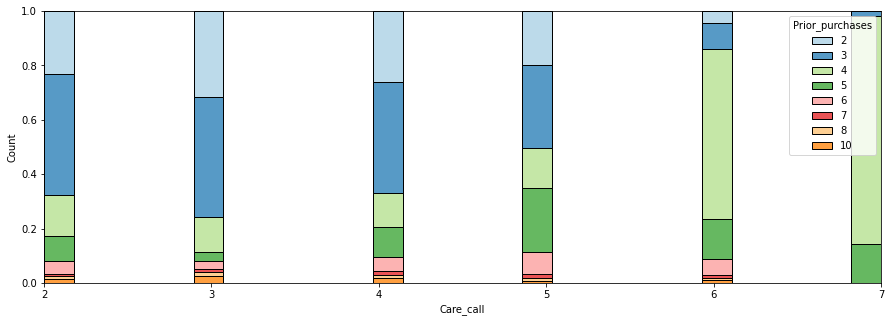

In [15]:
# 문의 전화 ~ 이전 구매 횟수
plt.figure(figsize=(15,5))

sns.histplot(x = df['Care_call'], hue = df['Prior_purchases'], palette = 'Paired', multiple='fill')
# sns.histplot(x = df['Prior_purchases'], hue = df['Care_call'], palette = 'Paired', multiple='fill')

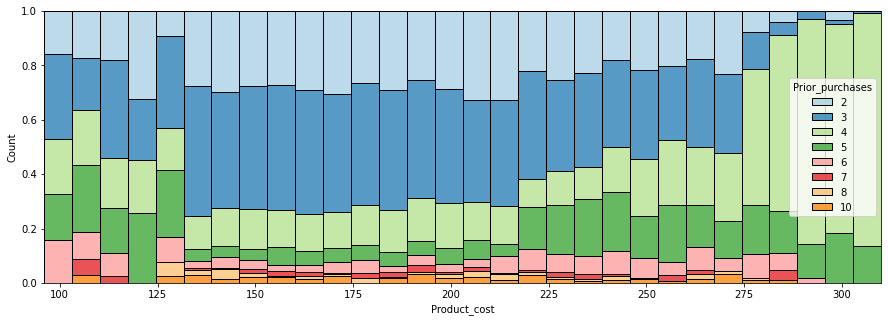

In [16]:
# 제품가격 ~ 이전 구매 횟수
plt.figure(figsize=(15,5))

sns.histplot(x = df['Product_cost'], hue = df['Prior_purchases'], palette = 'Paired', multiple='fill')
# sns.histplot(x = df['Product_cost'], hue = df['Prior_purchases'], palette = 'Paired', stat="count", element="step")

- 문의 전화와 제품가격이 높은 상관관계를 가지는 이유로 이전 구매 횟수는 두 변수에 대해 비슷한 분포를 가진다.
- 제품가격 275달러 이상, 문의 전화 6건 이상부터 이전 구매 횟수 4건의 비율이 크게 상승한다.

#### 문의 전화 6건 이상의 경우 이전 구매 횟수 기준 고객평가도와 정시 배송 여부

In [17]:
high_call = df[df['Care_call'] >= 6]

In [18]:
w = pd.DataFrame(high_call.groupby(['Prior_purchases']).Reach_ontime.value_counts(normalize=True)).sort_index()
w = w.rename(columns = {'Reach_ontime':'count'}).reset_index()
#w

In [19]:
w['Prior_purchases'] = w['Prior_purchases'].astype(str)
w['Reach_ontime'] = w['Reach_ontime'].astype(str)
w['P_R'] = w['Prior_purchases'].str.cat(w['Reach_ontime'], sep = ' in ')

In [20]:
# q = pd.DataFrame(high_call.groupby(['Prior_purchases','Reach_ontime','Rate'])['Rate'].agg(['count'])).reset_index()#.set_index('Prior_purchases')
# q['Prior_purchases'] = q['Prior_purchases'].astype(str)
# q['Reach_ontime'] = q['Reach_ontime'].astype(str)
# q['P_R'] = q['Prior_purchases'].str.cat(q['Reach_ontime'], sep = ' in ')

In [21]:
q = pd.DataFrame(high_call.groupby(['Prior_purchases','Reach_ontime']).Rate.value_counts(normalize=True)).sort_index()
q = q.rename(columns = {'Rate':'count'}).reset_index()
q['Prior_purchases'] = q['Prior_purchases'].astype(str)
q['Reach_ontime'] = q['Reach_ontime'].astype(str)
q['P_R'] = q['Prior_purchases'].str.cat(q['Reach_ontime'], sep = ' in ')

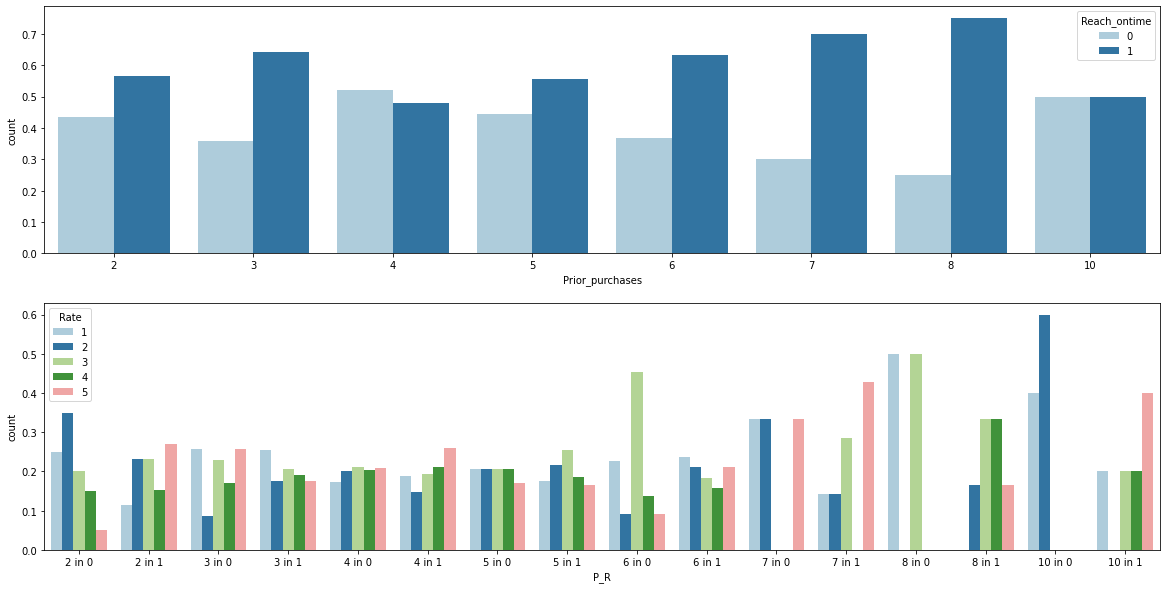

In [22]:
plt.figure(figsize = (20,10))

plt.subplot(2,1,1)
sns.barplot(x = w['Prior_purchases'], y = w['count'], hue = w['Reach_ontime'], palette = 'Paired')

plt.subplot(2,1,2)
sns.barplot(x = q['P_R'], y = q['count'], hue = q['Rate'], palette = 'Paired')

- 문의 전화가 6건 이상일 때, 이전 구매 횟수 4건을 제외한 모든 건수에서 정시에 배송하지 못한 비율이 높다.
- 오직 이전 구매 횟수 4건일 때, 정시에 배송된 비율이 높게 나타났다.

🎈 즉, 제품가격이 일정 금액 이상 높을 때, 고객들이 다른 때보다 많은 문의 전화를 한다. 하지만 이는 정시 배송 여부에 영향을 미치지 못한다.  
  - 고객만족도를 살펴보았을 때, 정시에 배송되지 못한 건의 평점비율이 정시에 배송된 건의 평점비율보다 높다.  
  - 이는 정시 배송 여부가 비싼 품목을 구매한 고객이 많은 문의 전화를 하게 된 요인이 아님을 뜻한다.  
  - 고객의 평가도는 다른 요인에 의해 작용했음을 시사한다.

## Distcount 와 Reach on time의 상관관계

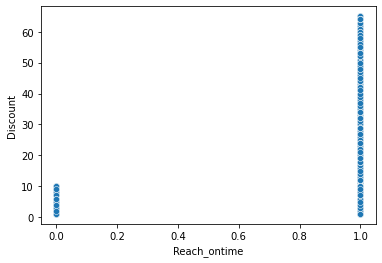

In [24]:
# 상관관계가 높은 변수들 간의 그래프
sns.scatterplot(y = df['Discount'], x = df['Reach_ontime'])

In [25]:
print(df.groupby('Reach_ontime')['Discount'].agg(['count','mean','min','max']))


              count       mean  min  max
Reach_ontime                            
0              4436   5.545987    1   10
1              6563  18.663721    1   65


- 그래프와 지표들을 보면 정시에 도착한 건들은 모두 10 이하의 낮은 할인금액 품목들이다.

### 할인금액 10 기준 정비배송 비율

In [26]:
# 10이하의 할인금액 정시배달
dis_low = df[df['Discount'] <= 10]
a = pd.DataFrame(dis_low.groupby('Reach_ontime')['Discount'].agg(['count','mean','min','max']))
print(a,'\n\n')

#10 초과의 할인금액 정시배달
dis_high = df[df['Discount'] > 10]
b = dis_high.groupby('Reach_ontime')['Discount'].agg(['count','mean','min','max'])
print(b)

              count      mean  min  max
Reach_ontime                           
0              4436  5.545987    1   10
1              3916  5.463483    1   10 


              count       mean  min  max
Reach_ontime                            
1              2647  38.192293   11   65


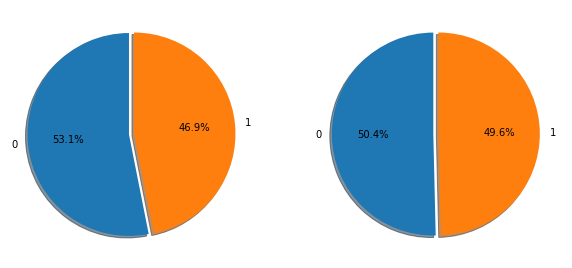

In [27]:
# 10이하의 할인금액 정시배달
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.pie(a['count'], autopct='%0.1f%%', labels = a['count'].index,
         startangle = 90,shadow = True, explode = (0.05,0))

plt.subplot(1,2,2)
plt.pie(a['mean'], autopct='%0.1f%%', labels = a['count'].index,
         startangle = 90,shadow = True, explode = (0.05,0))

plt.show()

- 10이하의 할인품목은 정시에 도착한 건이 6.2% 많다.
- 정시 도착 여부에 따라 할인가를 평균내어 봤을 때는 거의 차이가 없다.
- 10이하의 할인품목들은 평균 5.5의 할인값을 가지며, 정시에 배송될 확률이 조금 더 크다.

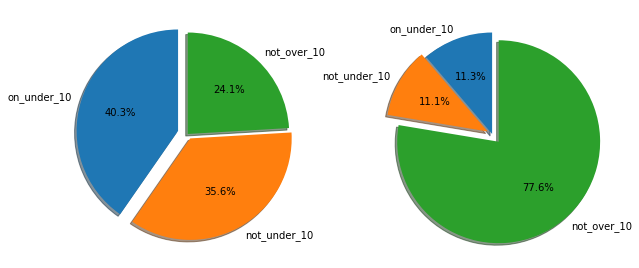

In [28]:
# 한번에

d = pd.concat([a,b])
d = d.reset_index().rename(index = {0:'on_under_10',1:'not_under_10',2:'not_over_10'})\
.drop(labels = 'Reach_ontime', axis =1)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.pie(d['count'], autopct='%0.1f%%', labels = d.index,
         startangle = 90,shadow = True, explode = (0.1,0.05,0))

plt.subplot(1,2,2)
plt.pie(d['mean'], autopct='%0.1f%%', labels = d.index,
         startangle = 90,shadow = True, explode = (0,0.05,0.1))

plt.show()

- 모든 품목 중 정시에 배달된 품목은 40.3%이다.
- 할인값이 10이상인 품목 중에서는 정시에 배송된 건이 한 건도 없다.
- 할인값이 10이상인 품목은 24.1%이지만, 평균값은 약 38.2로 전체 평균의 77.6%를 차지한다.
- 이를 통해 할인 값이 10이상인 품목은 정시에 배송되지 않을 확률이 매우 높음을 알 수 있다.

##### 미정시배송의 할인금액 10 기준 비율 (x)

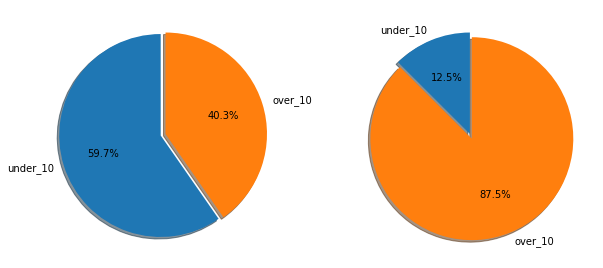

In [29]:
# 미정시배달의 할인금액
aa = pd.DataFrame(a.loc[1]).T
bb = pd.DataFrame(b)#.reset_index().drop(labels='Reach_ontime', axis=1)
c = pd.concat([aa,bb])
c = c.reset_index().rename(index = {0:'under_10',1:'over_10'}).drop(labels = 'index', axis =1)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.pie(c['count'], autopct='%0.1f%%', labels = c.index,
         startangle = 90,shadow = True, explode = (0.05,0))

plt.subplot(1,2,2)
plt.pie(c['mean'], autopct='%0.1f%%', labels = c.index,
         startangle = 90,shadow = True, explode = (0,0.05))

plt.show()

### 높은 할인 값의 평가도

In [53]:
df3 = df
df3['dis_over10'] = df['Discount'] > 10
df3['dis_high'] = df['Discount'] > 60
df3

n = pd.DataFrame(df.groupby(['dis_over10']).Rate.value_counts(normalize=True)).sort_index()
n = n.rename(columns = {'Rate':'count'}).reset_index()

m = pd.DataFrame(df.groupby(['dis_high']).Rate.value_counts(normalize=True)).sort_index()
m = m.rename(columns = {'Rate':'count'}).reset_index()

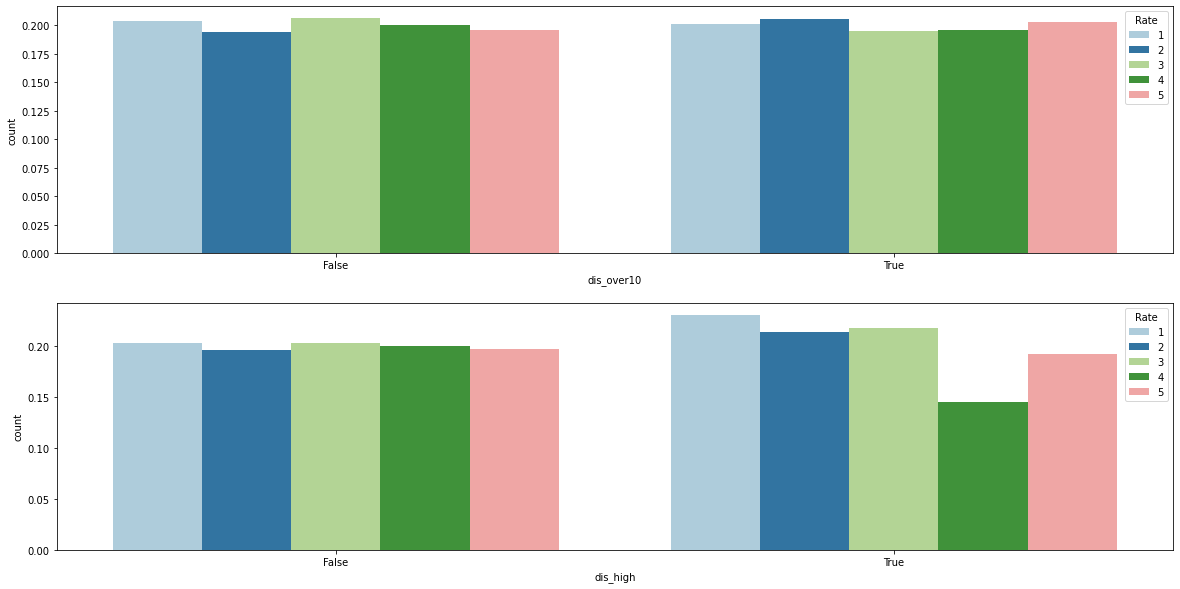

In [54]:
plt.figure(figsize = (20,10))

plt.subplot(2,1,1)
sns.barplot(x = n['dis_over10'], y = n['count'], hue = n['Rate'], palette = 'Paired')

plt.subplot(2,1,2)
sns.barplot(x = m['dis_high'], y = m['count'], hue = m['Rate'], palette = 'Paired')

- 할인값 10을 기준으로 나누어보았을 때, 고객에 평가도 비율은 큰 차이가 나타나지 않았다.
- 할인값 10초과 일때 정시 배송건이 0건인 것을 고려해보면, 정시 배송여부는 고객 평가도에 거의 영향을 미치지 않음을 알 수 있다.
- 할인값 60초과 일때 오히려 고객 평가도의 비율이 낮아졌다.

## 그럼 Care call >= 6 and discount high 별 rate?

In [59]:
high_call

,Warehouse,Shipment,Care_call,Rate,Product_cost,Prior_purchases,Product_importance,Gender,Discount,Weight,Reach_ontime
74,A,Ship,6,1,238,6,low,F,13,2442,1
87,B,Ship,6,2,278,3,medium,F,3,2974,1
156,D,Ship,6,3,275,5,low,M,41,2491,1
265,F,Road,7,2,203,5,medium,F,61,1856,1
364,C,Ship,6,2,146,3,low,F,62,1936,1
...,...,...,...,...,...,...,...,...,...,...,...
10833,B,Flight,6,5,258,5,low,F,1,5376,0
10836,D,Flight,6,4,186,2,low,M,5,4851,1
10856,A,Ship,6,5,206,2,low,F,6,5646,1
10862,A,Ship,6,4,242,3,medium,M,9,5920,0


In [79]:
step = 10
bins = list(range(0,70,step))
bins.append(70)
bins_label = [str(x)+' ~ '+str(x+step) for x in bins]
# print(bins)
# print(bins_label)

In [80]:
high_call['level'] = pd.cut(high_call['Discount'], bins, right=False)
# high_call['level'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
kk = pd.DataFrame(high_call.groupby(['level', 'Reach_ontime']).Rate.value_counts(normalize=True)).sort_index()
kk = kk.rename(columns = {'Rate':'count'}).reset_index()
#kk
kk['level'] = kk['level'].astype(str)
kk['Reach_ontime'] = kk['Reach_ontime'].astype(str)
kk['L_R'] = kk['level'].str.cat(kk['Reach_ontime'], sep = ' in ')
#kk

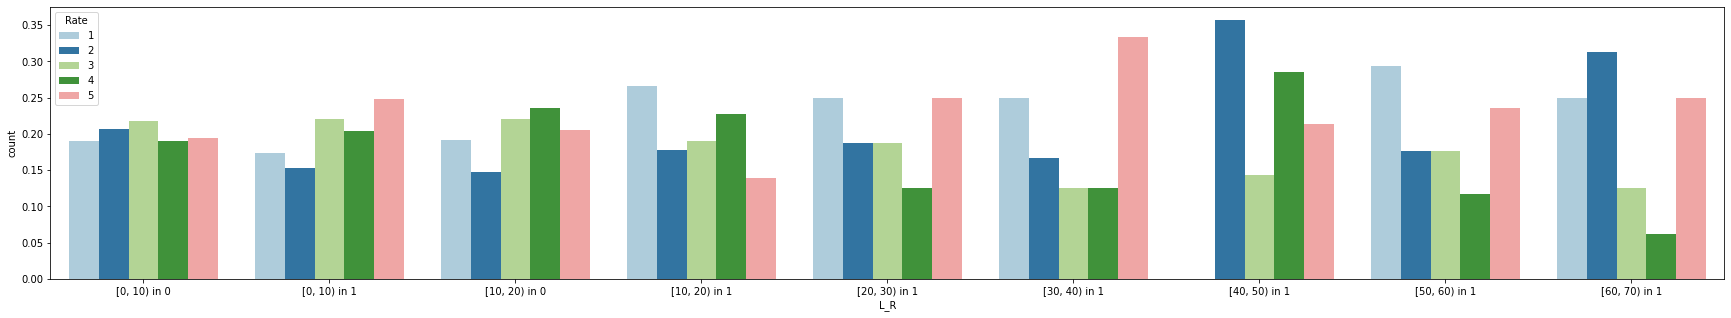

In [82]:
plt.figure(figsize = (30,5))

# plt.subplot(2,1,1)
sns.barplot(x = kk['L_R'], y = kk['count'], hue = kk['Rate'], palette = 'Paired')

- 비싼 품목을 구매하고 문의 전화를 6건이상 한 고객은 정시 배송여부로 평가도를 평가하지 않았다.
- 이 고객들은 할인값이 30~39일 때 비교적 좋은 평가도를 책정했다.